/tmp/ipython-input-2-4267022830.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2020-01-01', end='2025-07-30')
[*********************100%***********************]  1 of 1 completed


Successfully downloaded stock data:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620834  72.681281  71.373211  71.627084  135480400
2020-01-03  71.914833  72.676462  71.689973  71.847133  146322800
2020-01-06  72.487846  72.526533  70.783248  71.034709  118387200
2020-01-07  72.146927  72.753808  71.926900  72.497514  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200

Training the Linear Regression model...
Model training complete.
Making predictions on the test data...

Root Mean Squared Error (RMSE): 17.49
This value represents the typical error in dollars for the model's predictions.


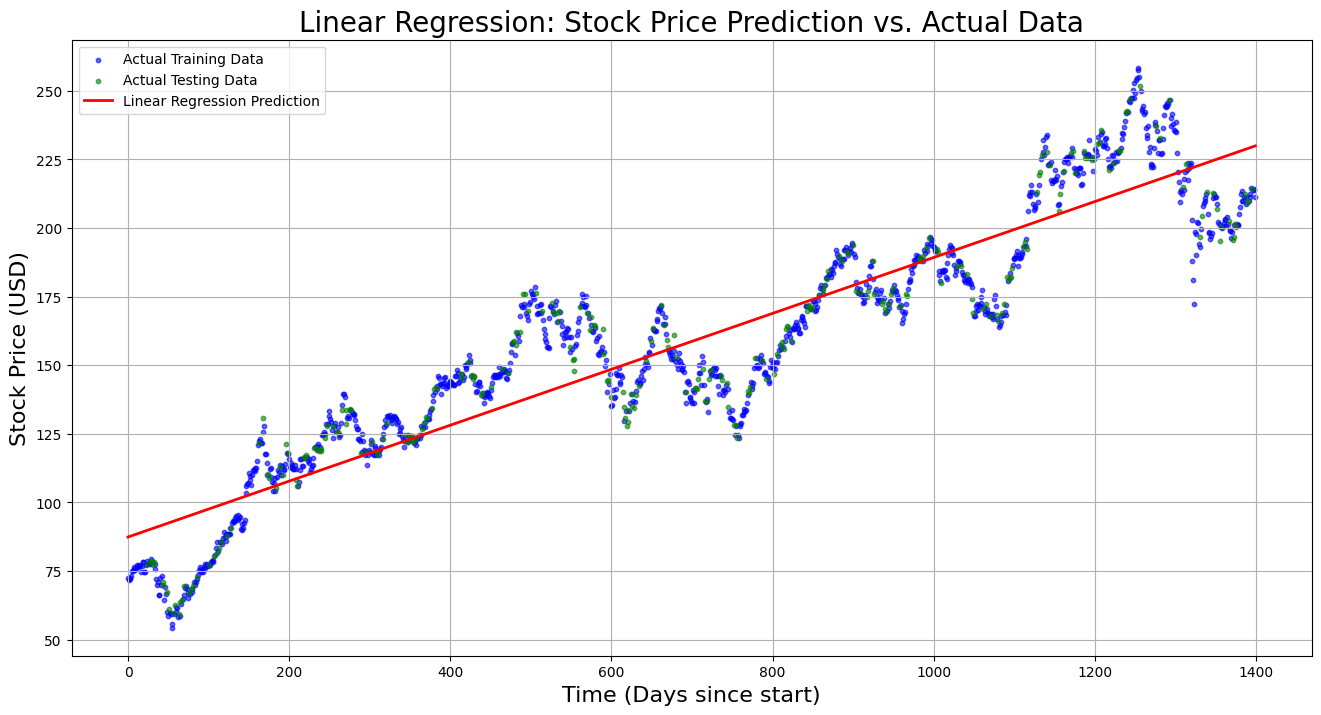


Predicted price for the next trading day: $230.02


In [2]:
# Import necessary libraries
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --- Step 1: Download Historical Stock Data ---
# We'll use Apple Inc. (AAPL) as an example.
# You can change the ticker to any stock symbol you want.
try:
    stock_data = yf.download('AAPL', start='2020-01-01', end='2025-07-30')
    if stock_data.empty:
        raise ValueError("No data downloaded. Check the ticker symbol or date range.")
    print("Successfully downloaded stock data:")
    print(stock_data.head())
except Exception as e:
    print(f"Error downloading data: {e}")
    exit()

# --- Step 2: Prepare the Data ---
# For linear regression, we need features (X) and a target (y).
# Our feature will be a simple time index (e.g., 0, 1, 2, ...),
# representing the passage of time.
# Our target will be the 'Close' price.

# Create the time index feature
# We reshape it to (-1, 1) because scikit-learn models expect a 2D array for features.
X = np.arange(len(stock_data)).reshape(-1, 1)

# Select the 'Close' price as the target variable
y = stock_data['Close'].values

# --- Step 3: Split Data into Training and Testing Sets ---
# We will use 80% of the data to train the model and the remaining 20% to test it.
# This helps us evaluate if the model can generalize to new, unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Create and Train the Linear Regression Model ---
# Instantiate the model
model = LinearRegression()

# Train the model using our training data
print("\nTraining the Linear Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- Step 5: Make Predictions on the Test Set ---
# Use the trained model to predict prices for the test set's time indices.
print("Making predictions on the test data...")
y_pred = model.predict(X_test)

# --- Step 6: Evaluate the Model ---
# We'll use Root Mean Squared Error (RMSE) to measure the model's performance.
# RMSE tells us the average distance between the predicted values and the actual values.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")
print("This value represents the typical error in dollars for the model's predictions.")


# --- Step 7: Visualize the Results ---
# A plot helps us understand how well our model fits the data.

plt.figure(figsize=(16, 8))
plt.title('Linear Regression: Stock Price Prediction vs. Actual Data', fontsize=20)
plt.xlabel('Time (Days since start)', fontsize=16)
plt.ylabel('Stock Price (USD)', fontsize=16)

# Plot the actual data points (training and testing)
plt.scatter(X_train, y_train, color='blue', label='Actual Training Data', alpha=0.6, s=10)
plt.scatter(X_test, y_test, color='green', label='Actual Testing Data', alpha=0.6, s=10)

# Plot the linear regression line (our model's predictions)
# We sort the X values to ensure the line is plotted correctly.
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression Prediction')

plt.legend()
plt.grid(True)
plt.show()

# --- Predict a Future Price ---
# Let's predict the price for the next day after our dataset ends.
last_day_index = len(stock_data)
future_price = model.predict([[last_day_index]])
print(f"\nPredicted price for the next trading day: ${future_price[0][0]:.2f}")